### Load Data

In [1]:
import pandas as pd

eeg_file = "../../data/Rubert_14_may/Rubert_mordida_1/EEG.csv"

df = pd.read_csv(eeg_file)
df.head()

,timestamp,sequence,battery,flags,EEG-ch1,EEG-ch2,EEG-ch3,EEG-ch4,EEG-ch5,EEG-ch6,EEG-ch7,EEG-ch8,EEG-ch9,EEG-ch10,EEG-ch11,EEG-ch12,EEG-ch13,EEG-ch14,EEG-ch15,EEG-ch16
0,153804687683,16336,-2,0,-2553.890054,-6876.865884,31106.838605,214.528663,22527.894451,8132.718209,21134.279463,30553.415250,-10230.794172,-5388.805234,17134.538498,10109.798595,-17322.626756,17221.805220,-10619.150551,9531.200275
1,153804687683,16336,-2,0,-2557.710711,-6880.297175,31105.195966,214.772017,22528.880034,8132.827718,21137.443064,30554.473840,-10229.407054,-5388.087339,17137.081547,10109.774259,-17321.945365,17222.158083,-10620.878364,9531.504468
2,153804687683,16336,-2,0,-2570.961333,-6885.176421,31096.520398,210.002279,22524.438825,8130.528023,21134.948686,30551.626599,-10230.392638,-5389.218935,17135.268560,10101.329878,-17325.364488,17223.642542,-10621.778774,9531.832996
3,153804687683,16336,-2,0,-2585.039358,-6887.330103,31091.774996,201.935096,22518.805181,8127.899801,21129.205533,30548.767190,-10233.677916,-5390.934580,17132.956698,10096.827830,-17330.377579,17223.715548,-10622.642680,9530.056512
4,153804687683,16336,-2,0,-2573.200189,-6886.064663,31095.473976,200.523644,22517.126039,8126.330168,21127.404714,30550.957375,-10236.634666,-5391.761984,17130.401481,10101.926095,-17333.188317,17223.350517,-10622.022128,9527.744649


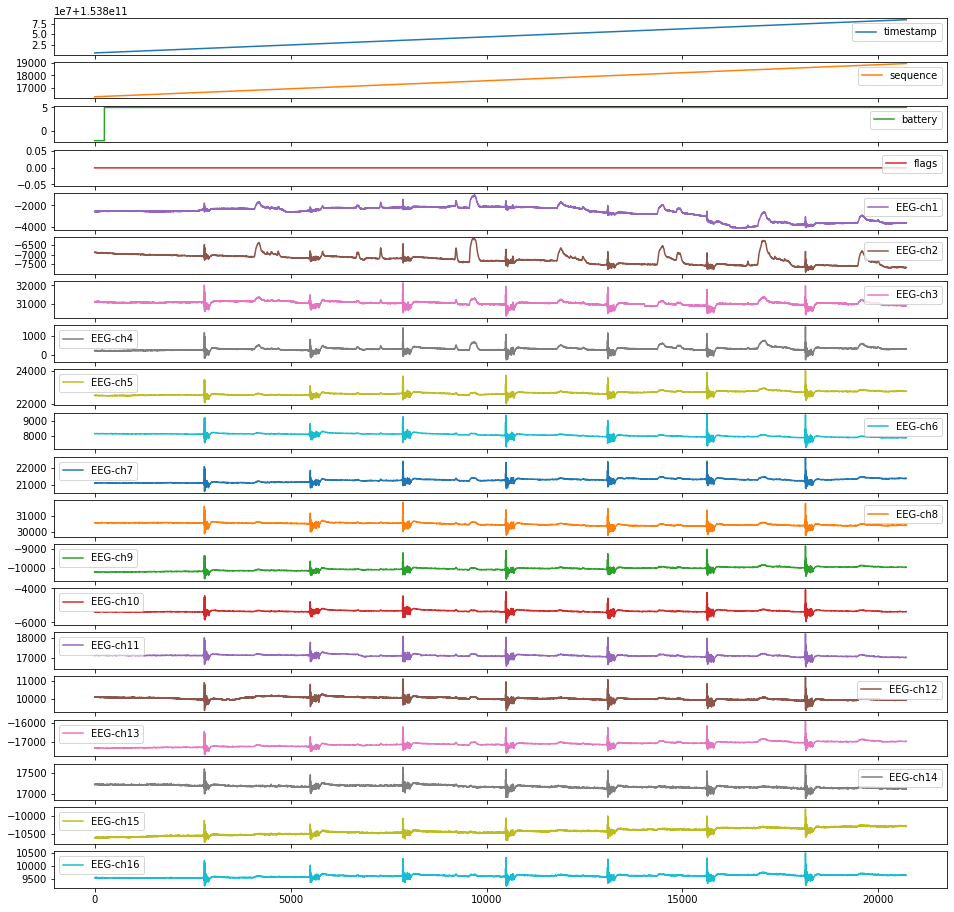

In [2]:
df.plot(subplots=True, figsize=(16, 16));

### Loading Data with BBT to operate on Frequency

In [3]:
import bbtools as bbt

raw_rubert = bbt.read_csv(eeg_file,
                        ['Fp1', 'Fp2', 'F3', 'F4', 'C1', 'C3', 'C2', 'C4', 'CP1', 'CP3', 'CP2', 'CP4', 'Cz', 'O1', 'O2', 'Pz'])

Creating RawArray with float64 data, n_channels=16, n_times=20712
    Range : 0 ... 20711 =      0.000 ...    80.902 secs
Ready.


Effective window size : 8.000 (s)


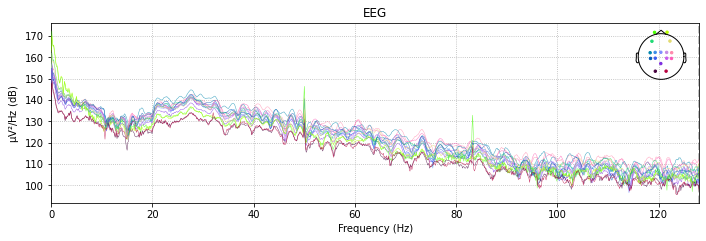

In [4]:
plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd(fmin = 0, fmax = 128, average=True, tmin = 0, tmax = 120)
#plot_raw = raw_rubert.plot_psd()

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 1e+02 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 100.00 Hz
- Upper transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 112.50 Hz)
- Filter length: 1691 samples (6.605 sec)

Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 1691 samples (6.605 sec)

Effective window size : 8.000 (s)


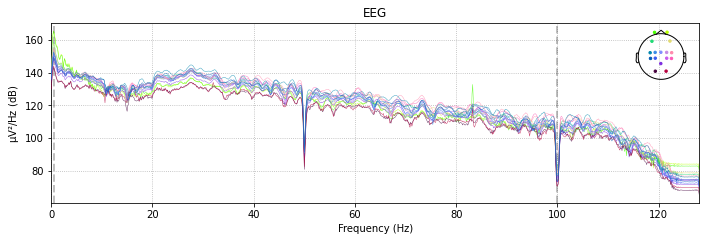

In [5]:
filtered_rubert = bbt.filters(raw_rubert)
plot_filtered = filtered_rubert.plot_psd(fmin = 0, fmax = 128, average=False, tmin = 0, tmax = 120)

In [6]:
save_path = '../../data/pickle/'

df.to_pickle(save_path + 'rubert_jaw_1.pkl')

### Slicing into smaller temporal windows

In [2]:
import bbtools as bbt

sampling_rate = 256
window_time = 5 # segs
window_size = window_time * sampling_rate
n_channels = 16

channelsData = bbt.signal_df_to_np(df, window_size, n_channels)

print("---SHAPE---")
print(channelsData.shape)
print("---DATA---")
print(channelsData)

---SHAPE---
(16, 16, 1280)
---DATA---
[[[ -2553.89005386  -2557.71071067  -2570.96133251 ...  -2558.12441236
    -2568.63730241  -2559.62103907]
  [ -2535.57767015  -2521.2076202   -2535.93053335 ...  -2499.28143052
    -2517.66682042  -2524.85792924]
  [ -2511.40045656  -2507.89615987  -2526.30588517 ...  -2285.31248189
    -2305.04848614  -2305.1823308 ]
  ...
  [ -4048.19273299  -4040.22289157  -4028.51756723 ...  -3763.73631667
    -3773.33662946  -3779.2988009 ]
  [ -3777.70483262  -3765.57363889  -3754.53753787 ...  -3616.27599887
    -3623.23592145  -3635.00208428]
  [ -3641.25628045  -3631.43694911  -3628.61404345 ...  -3642.49738552
    -3651.84217668  -3661.90486195]]

 [[ -6876.86588421  -6880.29717471  -6885.17642114 ...  -7008.84889165
    -7008.82455625  -6998.03180917]
  [ -6991.30307283  -6988.02996238  -6993.05522117 ...  -7069.37101565
    -7073.43502638  -7073.34985251]
  [ -7073.53236796  -7073.64187723  -7075.79555957 ...  -7088.51080275
    -7093.6820739   -7091.6

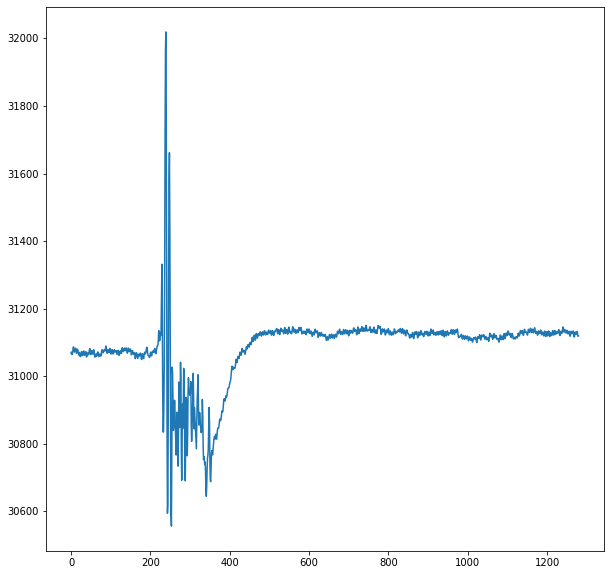

In [3]:
import matplotlib.pyplot as plt

channel = channelsData[2]
# shape (samples, window)

# Data sequence
# pause pause signal pause ...

window = channel[2]

plt.figure(figsize=(10,10))
plt.plot(window)
plt.show()

### Labeling data

In [4]:
channels_list_df = bbt.channels_to_list_df(channelsData, 'jaw')

channel = channels_list_df[0]
channel.head()

,label,0,1,2,3,4,5,6,7,8,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,pause,-2553.890054,-2557.710711,-2570.961333,-2585.039358,-2573.200189,-2554.632283,-2559.548033,-2570.936997,-2576.010927,...,-2528.848934,-2529.408648,-2541.661519,-2553.379011,-2545.749865,-2528.702921,-2536.113049,-2558.124412,-2568.637302,-2559.621039
1,pause,-2535.577670,-2521.207620,-2535.930533,-2555.058153,-2549.485348,-2540.688103,-2537.062129,-2544.520927,-2560.229424,...,-2494.073656,-2490.703204,-2505.778981,-2518.810584,-2508.236855,-2495.521612,-2491.834800,-2499.281431,-2517.666820,-2524.857929
2,jaw,-2511.400457,-2507.896160,-2526.305885,-2534.044540,-2521.742999,-2501.374274,-2485.483262,-2494.840221,-2520.368049,...,-2290.009213,-2281.650005,-2293.537845,-2302.079568,-2299.633861,-2290.885287,-2278.827099,-2285.312482,-2305.048486,-2305.182331
3,pause,-2290.094387,-2286.371072,-2290.532424,-2306.277424,-2316.242767,-2302.262084,-2283.609004,-2288.792443,-2302.067400,...,-2595.673925,-2584.017271,-2585.258376,-2592.096622,-2598.934868,-2588.872182,-2571.350699,-2576.375958,-2591.634249,-2596.951533
4,jaw,-2594.213801,-2584.929848,-2581.486390,-2598.630675,-2614.217495,-2604.909207,-2594.761347,-2590.928523,-2594.469323,...,-2226.615512,-2212.902518,-2205.090857,-2219.801602,-2240.231165,-2231.579933,-2218.426652,-2217.258554,-2223.293731,-2236.666030


In [5]:
for channel_df in channels_list_df:
    channel_df['label'] = channel_df['label'].replace({'pause': 0, 'jaw': 1})

channel = channels_list_df[0]
channel.head()

,label,0,1,2,3,4,5,6,7,8,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,0,-2553.890054,-2557.710711,-2570.961333,-2585.039358,-2573.200189,-2554.632283,-2559.548033,-2570.936997,-2576.010927,...,-2528.848934,-2529.408648,-2541.661519,-2553.379011,-2545.749865,-2528.702921,-2536.113049,-2558.124412,-2568.637302,-2559.621039
1,0,-2535.577670,-2521.207620,-2535.930533,-2555.058153,-2549.485348,-2540.688103,-2537.062129,-2544.520927,-2560.229424,...,-2494.073656,-2490.703204,-2505.778981,-2518.810584,-2508.236855,-2495.521612,-2491.834800,-2499.281431,-2517.666820,-2524.857929
2,1,-2511.400457,-2507.896160,-2526.305885,-2534.044540,-2521.742999,-2501.374274,-2485.483262,-2494.840221,-2520.368049,...,-2290.009213,-2281.650005,-2293.537845,-2302.079568,-2299.633861,-2290.885287,-2278.827099,-2285.312482,-2305.048486,-2305.182331
3,0,-2290.094387,-2286.371072,-2290.532424,-2306.277424,-2316.242767,-2302.262084,-2283.609004,-2288.792443,-2302.067400,...,-2595.673925,-2584.017271,-2585.258376,-2592.096622,-2598.934868,-2588.872182,-2571.350699,-2576.375958,-2591.634249,-2596.951533
4,1,-2594.213801,-2584.929848,-2581.486390,-2598.630675,-2614.217495,-2604.909207,-2594.761347,-2590.928523,-2594.469323,...,-2226.615512,-2212.902518,-2205.090857,-2219.801602,-2240.231165,-2231.579933,-2218.426652,-2217.258554,-2223.293731,-2236.666030


In [7]:
channel = channels_list_df[0]

Y = channel_df['label']
Y.head()

0    0
1    0
2    1
3    0
4    1
Name: label, dtype: int64

In [8]:
X = channel.drop(['label'], axis=1)
X.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,-2553.890054,-2557.710711,-2570.961333,-2585.039358,-2573.200189,-2554.632283,-2559.548033,-2570.936997,-2576.010927,-2569.489041,...,-2528.848934,-2529.408648,-2541.661519,-2553.379011,-2545.749865,-2528.702921,-2536.113049,-2558.124412,-2568.637302,-2559.621039
1,-2535.577670,-2521.207620,-2535.930533,-2555.058153,-2549.485348,-2540.688103,-2537.062129,-2544.520927,-2560.229424,-2560.059076,...,-2494.073656,-2490.703204,-2505.778981,-2518.810584,-2508.236855,-2495.521612,-2491.834800,-2499.281431,-2517.666820,-2524.857929
2,-2511.400457,-2507.896160,-2526.305885,-2534.044540,-2521.742999,-2501.374274,-2485.483262,-2494.840221,-2520.368049,-2526.293717,...,-2290.009213,-2281.650005,-2293.537845,-2302.079568,-2299.633861,-2290.885287,-2278.827099,-2285.312482,-2305.048486,-2305.182331
3,-2290.094387,-2286.371072,-2290.532424,-2306.277424,-2316.242767,-2302.262084,-2283.609004,-2288.792443,-2302.067400,-2307.786218,...,-2595.673925,-2584.017271,-2585.258376,-2592.096622,-2598.934868,-2588.872182,-2571.350699,-2576.375958,-2591.634249,-2596.951533
4,-2594.213801,-2584.929848,-2581.486390,-2598.630675,-2614.217495,-2604.909207,-2594.761347,-2590.928523,-2594.469323,-2601.636096,...,-2226.615512,-2212.902518,-2205.090857,-2219.801602,-2240.231165,-2231.579933,-2218.426652,-2217.258554,-2223.293731,-2236.666030


In [9]:
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression

seed = 1234

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.25, shuffle=True,random_state=seed)

X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
14,-3777.704833,-3765.573639,-3754.537538,-3767.995011,-3788.704431,-3787.378152,-3776.548901,-3770.465053,-3774.078859,-3790.505250,...,-3639.126934,-3625.730299,-3619.390929,-3630.998912,-3644.273869,-3633.992165,-3616.519353,-3616.275999,-3623.235921,-3635.002084
2,-2511.400457,-2507.896160,-2526.305885,-2534.044540,-2521.742999,-2501.374274,-2485.483262,-2494.840221,-2520.368049,-2526.293717,...,-2290.009213,-2281.650005,-2293.537845,-2302.079568,-2299.633861,-2290.885287,-2278.827099,-2285.312482,-2305.048486,-2305.182331
10,-2546.078393,-2539.081967,-2535.723683,-2552.758458,-2569.720227,-2579.685571,-2575.451213,-2561.811224,-2565.485869,-2583.323712,...,-2795.272823,-2780.659420,-2771.144281,-2785.100629,-2797.024972,-2797.840207,-2791.354825,-2779.892855,-2784.090710,-2802.086734
7,-2200.990343,-2189.212012,-2179.769880,-2180.706792,-2193.604551,-2195.527047,-2172.578771,-2154.436735,-2157.855858,-2168.782449,...,-2112.774541,-2103.393247,-2100.813695,-2103.125557,-2114.952559,-2119.770967,-2103.393247,-2091.468904,-2101.701937,-2112.652864
1,-2535.577670,-2521.207620,-2535.930533,-2555.058153,-2549.485348,-2540.688103,-2537.062129,-2544.520927,-2560.229424,-2560.059076,...,-2494.073656,-2490.703204,-2505.778981,-2518.810584,-2508.236855,-2495.521612,-2491.834800,-2499.281431,-2517.666820,-2524.857929


In [10]:
from sklearn.model_selection import GridSearchCV

lr_params = {'C': [9.08, 10.08, 100.08,200.08],
             'max_iter': [100,200, 500, 1000,50000,100000]}

lr_grid = GridSearchCV(estimator=LogisticRegression(random_state=seed),
                       param_grid=lr_params,
                       cv=3).fit(X_train, y_train)

lr_grid.best_estimator_.get_params()

/Users/miguel.hidalgo/PycharmProjects/BCI/ProfessorX-Project/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/miguel.hidalgo/PycharmProjects/BCI/ProfessorX-Project/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solve

{'C': 9.08,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 1234,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [11]:
lr_opt = LogisticRegression(C=9.08, max_iter=100, penalty='l2', random_state=seed)
stats = lr_opt.fit(X_train, y_train)
score = lr_opt.score(X_test, y_test)

print("--stats--")
print(stats)
print("--score--")
print(score)

--stats--
LogisticRegression(C=9.08, random_state=1234)
--score--
0.75


/Users/miguel.hidalgo/PycharmProjects/BCI/ProfessorX-Project/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


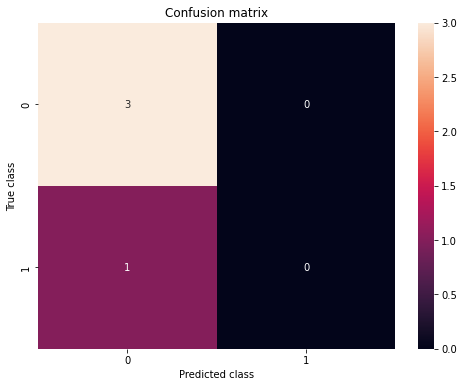

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

y_pred_lr = lr_opt.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred_lr, labels=[0, 1])
plt.figure(figsize=[8, 6])
sns.heatmap(conf_matrix,
            annot=True,
            fmt='d')
plt.title('Confusion matrix')
plt.ylabel('True class')
plt.xlabel('Predicted class');